# Result Analysis

In [91]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

## Open Files

In [92]:
# Open the JSON file

input_data = {}

path = './../ft_results/vit_b_16_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet50_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet18_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet18_ucmerced_landuse_results.jsonresnet18_ucmerced_landuse_results.csv'

df = pd.read_csv(path)

df.head()

,Experiment,Optimizer,Learning_Rate,Batch_Size,Accuracy,Precision,Recall,F1,Execution_Time,Fold_Number
0,44,AdamW,0.001,32,0.750000,0.765867,0.753833,0.751822,1794.489294,4
1,31,SGD,0.001,32,0.933333,0.931199,0.930867,0.928650,1896.408233,1
2,33,SGD,0.001,32,0.945238,0.946993,0.944431,0.943251,1891.289057,3
3,37,Adam,0.001,32,0.754762,0.747948,0.755634,0.744285,1906.500394,2
4,39,Adam,0.001,32,0.730952,0.748589,0.739435,0.735512,1920.493797,4


### Data Shape

In [93]:
num_rows, num_cols = df.shape

print(f'Number of Rows: {num_rows}')
print(f'Number of Cols: {num_cols}')


Number of Rows: 47
Number of Cols: 10


### Single Best Experiment Fold (Accuracy)

In [94]:
max_index = df['Accuracy'].idxmax()


for col in df.columns:
    print(f'{col}: {df[col][max_index]}')

Experiment: 34
Optimizer: SGD
Learning_Rate: 0.001
Batch_Size: 32
Accuracy: 0.9476190476190476
Precision: 0.9489363918264172
Recall: 0.9504895336736768
F1: 0.9490774365350796
Execution_Time: 1970.5475194454195
Fold_Number: 4


### Best Experiment (Combined Folds) (Accuracy)

In [95]:
df_avg = df.groupby(['Optimizer', 'Learning_Rate']).mean().reset_index()

max_acc_idx = df_avg['Accuracy'].idxmax()

# print(max_acc_idx)

for col in df_avg.columns:
    print(f'{col}: {df[col][max_acc_idx]}')

# df_avg.head()

Optimizer: AdamW
Learning_Rate: 0.0001
Experiment: 59
Batch_Size: 32
Accuracy: 0.8761904761904762
Precision: 0.886494618544917
Recall: 0.8851826608236335
F1: 0.882013363429834
Execution_Time: 1949.186829328537
Fold_Number: 4


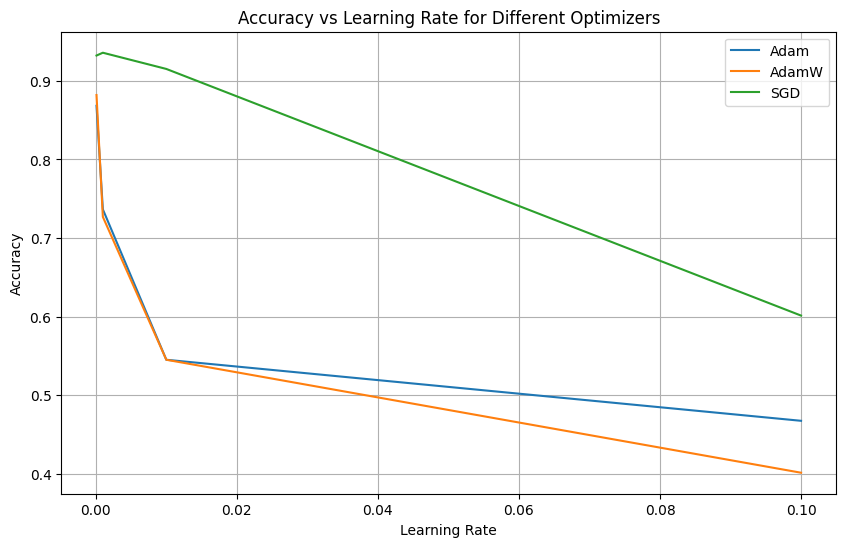

In [96]:
# Get the unique optimizers
optimizers = df_avg['Optimizer'].unique()

# Create the plot
plt.figure(figsize=(10, 6))

for optimizer in optimizers:
    optimizer_data = df_avg[df_avg['Optimizer'] == optimizer]
    plt.plot(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=optimizer)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers')
plt.legend()
plt.grid()
plt.show()

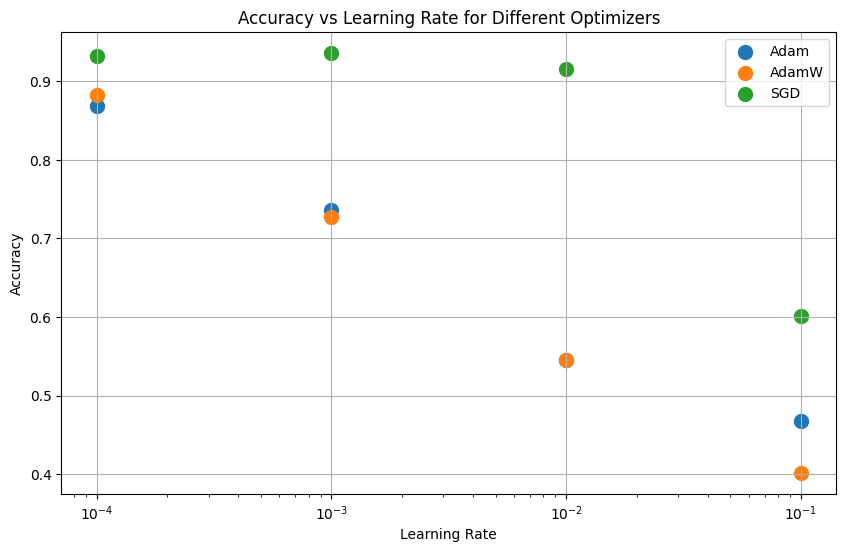

In [97]:
optimizers = df_avg['Optimizer'].unique()

# Create the plot
plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    optimizer_data = df_avg[df_avg['Optimizer'] == optimizer]
    plt.scatter(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=optimizer, s=100)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.legend()
plt.grid()
plt.show()

Optimizer	Learning Rate	Accuracy
--------------------------------------------------
Adam	0.0001	0.868
AdamW	0.0001	0.882
SGD	0.0010	0.936
--------------------------------------------------


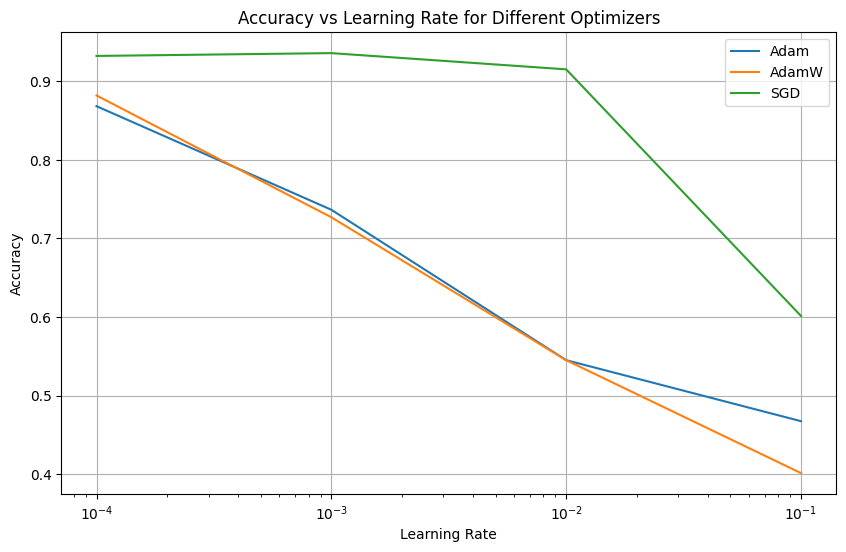

In [98]:
optimizers = df_avg['Optimizer'].unique()

print("Optimizer\tLearning Rate\tAccuracy")
print("-" * 50)

for i, optimizer in enumerate(optimizers):
    optimizer_data = df_avg[df_avg['Optimizer'] == optimizer]
    max_acc_idx = optimizer_data['Accuracy'].idxmax()
    max_acc = optimizer_data['Accuracy'][max_acc_idx]
    learning_rate = optimizer_data['Learning_Rate'][max_acc_idx]
    print(f"{optimizer}\t{learning_rate:.4f}\t{max_acc:.3f}")

print("-" * 50)

# Create the plot
plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    optimizer_data = df_avg[df_avg['Optimizer'] == optimizer]
    plt.plot(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=optimizer)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.legend()
plt.grid()
plt.show()